In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('precision', 5)

In [2]:
wind = pd.read_csv('powerproduction.txt')
wind

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
wind.columns

Index(['speed', 'power'], dtype='object')

In [4]:
wind.shape

(500, 2)

In [5]:
wind.isna().sum()

speed    0
power    0
dtype: int64

In [6]:
wind.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
wind.describe()

,speed,power
count,500.00000,500.00000
mean,12.59040,48.01458
std,7.22499,41.61457
min,0.00000,0.00000
25%,6.32475,5.28800
50%,12.55050,41.64550
75%,18.77525,93.53700
max,25.00000,113.55600


In [8]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


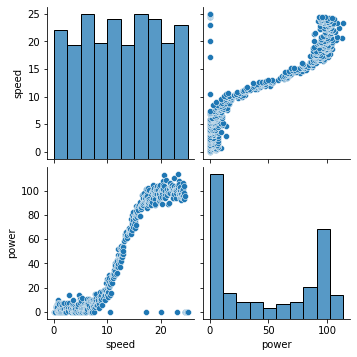

In [9]:
sns.pairplot(wind);

Seems to be some outliers here. I think its reasonable to assume that if the turbine was functioning porperly, there would be power output. So I will assume that these zero values for power, were for times when the turbine was offline due to maintenance or was malfunctioning.

In [10]:
wind = wind[wind['power'] != 0.000]

In [11]:
wind.describe()

,speed,power
count,451.00000,451.00000
mean,13.00430,53.23125
std,6.83598,40.52205
min,0.32500,0.06700
25%,7.34450,8.54350
50%,13.03800,58.16800
75%,18.78150,94.72550
max,24.39900,113.55600


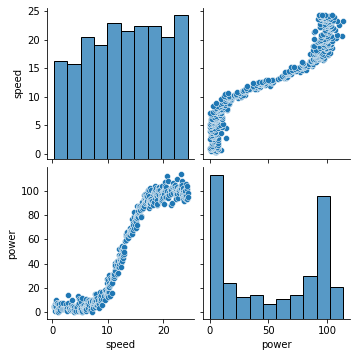

In [12]:
sns.pairplot(wind);

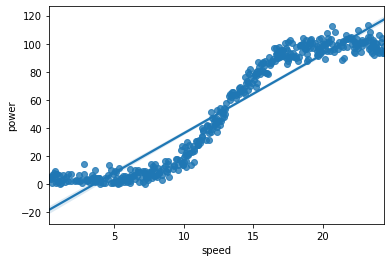

In [13]:
sns.regplot(x="speed", y="power", data=wind);

In [14]:
import sklearn.linear_model as lin

x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [15]:
r

0.8984832870534454

In [16]:
p

[-19.837685452108396, 5.618827837778541]

In [17]:
def f(x, p):
    return p[0] + x * p[1]

In [18]:
f(13,p)

53.207076439012646

In [19]:
def predict(x):
    return f(x,p)

In [20]:
predict(13)

53.207076439012646

In [21]:
predict(17.5)

78.49180170901607

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

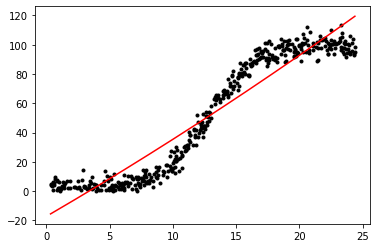

In [24]:
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [25]:
a, b, c , d = np.polyfit(x, y, 3)

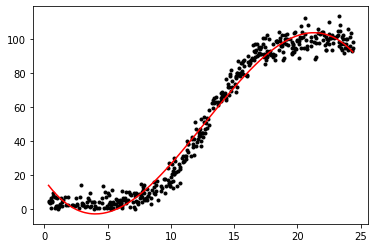

In [26]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

In [27]:
p

[-19.837685452108396, 5.618827837778541]

In [28]:
import tensorflow.keras as kr

In [29]:
model = kr.models.Sequential()

In [30]:
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [31]:
model.compile('adam', loss='mean_squared_error')

In [32]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 4626.2402
Epoch 2/500
46/46 [==============================] - 0s 7ms/step - loss: 4616.3989
Epoch 3/500
46/46 [==============================] - 0s 7ms/step - loss: 4606.5957: 0s - loss:
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 4596.9766
Epoch 5/500
46/46 [==============================] - 0s 5ms/step - loss: 4587.1646
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 4577.4956
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 4568.0137
Epoch 8/500
46/46 [==============================] - 0s 4ms/step - loss: 4558.5137
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 4548.9736
Epoch 10/500
46/46 [==============================] - 0s 4ms/step - loss: 4539.3223
Epoch 11/500
46/46 [==============================] - 0s 5ms/step - loss: 4529.6694
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss:

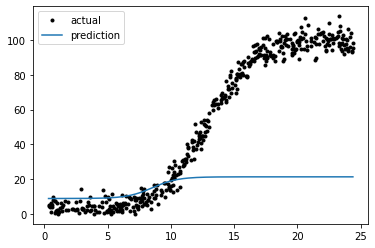

In [33]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [34]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [35]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4547.3955
Epoch 2/500
46/46 [==============================] - 0s 5ms/step - loss: 4511.3066
Epoch 3/500
46/46 [==============================] - 0s 5ms/step - loss: 4480.1758
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 4451.0098
Epoch 5/500
46/46 [==============================] - 0s 5ms/step - loss: 4416.4531: 0s - loss: 449
Epoch 6/500
46/46 [==============================] - ETA: 0s - loss: 4311.91 - 0s 4ms/step - loss: 4347.8032
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4244.2515
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 4185.8408
Epoch 9/500
46/46 [==============================] - 0s 5ms/step - loss: 4144.9272
Epoch 10/500
46/46 [==============================] - 0s 4ms/step - loss: 4109.7100
Epoch 11/500
46/46 [==============================] - 0s 4ms/step - loss: 4076.7512
Epoch 12/500
46/46 [=======================

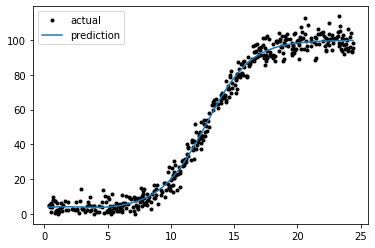

In [36]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [37]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [38]:
model.fit(x, y, epochs=750, batch_size=10)

Epoch 1/750
46/46 [==============================] - 0s 4ms/step - loss: 4458.2876
Epoch 2/750
46/46 [==============================] - 0s 5ms/step - loss: 4408.6758
Epoch 3/750
46/46 [==============================] - 0s 9ms/step - loss: 4365.6499
Epoch 4/750
46/46 [==============================] - 0s 4ms/step - loss: 4322.2944
Epoch 5/750
46/46 [==============================] - 0s 3ms/step - loss: 4263.8247
Epoch 6/750
46/46 [==============================] - 0s 6ms/step - loss: 4209.0415
Epoch 7/750
46/46 [==============================] - 0s 6ms/step - loss: 4159.2114
Epoch 8/750
46/46 [==============================] - 0s 6ms/step - loss: 4063.0957
Epoch 9/750
46/46 [==============================] - 0s 5ms/step - loss: 3950.4421
Epoch 10/750
46/46 [==============================] - 0s 4ms/step - loss: 3885.0962
Epoch 11/750
46/46 [==============================] - 0s 4ms/step - loss: 3832.6787
Epoch 12/750
46/46 [==============================] - 0s 3ms/step - loss: 3781.0759
E

In [39]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [40]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4433.5479
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 4368.4624
Epoch 3/500
46/46 [==============================] - 0s 5ms/step - loss: 4282.5322
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4165.4746
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 4019.8352
Epoch 6/500
46/46 [==============================] - 0s 6ms/step - loss: 3860.7405
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 3744.7380
Epoch 8/500
46/46 [==============================] - 0s 4ms/step - loss: 3659.8643
Epoch 9/500
46/46 [==============================] - 0s 4ms/step - loss: 3587.1455
Epoch 10/500
46/46 [==============================] - 0s 4ms/step - loss: 3520.1074: 0s - loss: 3423.
Epoch 11/500
46/46 [==============================] - 0s 5ms/step - loss: 3458.8115
Epoch 12/500
46/46 [==============================] - 0s 4ms/step -

In [41]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [42]:
model.fit(x, y, epochs=750, batch_size=10)

Epoch 1/750
46/46 [==============================] - 0s 5ms/step - loss: 4382.0122
Epoch 2/750
46/46 [==============================] - 0s 3ms/step - loss: 4295.8320
Epoch 3/750
46/46 [==============================] - 0s 4ms/step - loss: 4194.3765
Epoch 4/750
46/46 [==============================] - 0s 4ms/step - loss: 4083.8037
Epoch 5/750
46/46 [==============================] - 0s 4ms/step - loss: 3969.8875
Epoch 6/750
46/46 [==============================] - 0s 5ms/step - loss: 3840.7273
Epoch 7/750
46/46 [==============================] - 0s 3ms/step - loss: 3730.6018
Epoch 8/750
46/46 [==============================] - 0s 4ms/step - loss: 3643.7749
Epoch 9/750
46/46 [==============================] - 0s 4ms/step - loss: 3557.9441
Epoch 10/750
46/46 [==============================] - 0s 4ms/step - loss: 3487.5696
Epoch 11/750
46/46 [==============================] - 0s 4ms/step - loss: 3422.2029
Epoch 12/750
46/46 [==============================] - 0s 4ms/step - loss: 3361.3140
E

In [43]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(9, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [44]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 4606.6431
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 4543.8613
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4469.7046
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4389.3916
Epoch 5/500
46/46 [==============================] - 0s 5ms/step - loss: 4297.5684
Epoch 6/500
46/46 [==============================] - 0s 5ms/step - loss: 4220.3760
Epoch 7/500
46/46 [==============================] - 0s 5ms/step - loss: 4167.5049
Epoch 8/500
46/46 [==============================] - 0s 6ms/step - loss: 4116.9429
Epoch 9/500
46/46 [==============================] - 0s 4ms/step - loss: 4055.8621
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 4003.6006
Epoch 11/500
46/46 [==============================] - 0s 4ms/step - loss: 3936.2729
Epoch 12/500
46/46 [==============================] - 0s 4ms/step - loss: 3872.5417: 

In [45]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [46]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 6336.1606
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 5859.6216
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 5447.8643
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 5092.5854
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4780.3008
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4441.1323
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4088.3357
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 3731.6328
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 3377.0427
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3018.6345
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 2674.1704
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 2338.2524
E

In [47]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='softmax', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [48]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4635.0098
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 4623.4199
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4613.0488
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 4602.6147
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4591.2573
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4559.1885
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4527.3389
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 4511.5771
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 4497.9229
Epoch 10/500
46/46 [==============================] - 0s 4ms/step - loss: 4485.5254
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 4473.7271
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 4462.4292
E

In [49]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [50]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 6ms/step - loss: 4254.5352
Epoch 2/500
46/46 [==============================] - 0s 5ms/step - loss: 4208.9233
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4157.7959
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4111.1465
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4072.2271
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 4020.6311
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 3956.0129
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 3911.2747
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 3874.0288
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3840.8960
Epoch 11/500
46/46 [==============================] - 0s 7ms/step - loss: 3808.4661
Epoch 12/500
46/46 [==============================] - 0s 5ms/step - loss: 3777.5881
E

In [ ]:
model.summary()

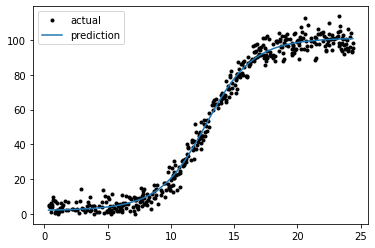

In [52]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [53]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [54]:
model.fit(x, y, epochs=500, batch_size=2)

Epoch 1/500
226/226 [==============================] - 1s 5ms/step - loss: 4487.3540
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 4293.2310
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 4090.2266
Epoch 4/500
226/226 [==============================] - 1s 4ms/step - loss: 3906.0007
Epoch 5/500
226/226 [==============================] - 1s 4ms/step - loss: 3764.5264
Epoch 6/500
226/226 [==============================] - 1s 3ms/step - loss: 3637.4617
Epoch 7/500
226/226 [==============================] - 1s 3ms/step - loss: 3517.5847
Epoch 8/500
226/226 [==============================] - 1s 4ms/step - loss: 3399.7524
Epoch 9/500
226/226 [==============================] - 1s 3ms/step - loss: 3232.2319
Epoch 10/500
226/226 [==============================] - 1s 3ms/step - loss: 3099.4553
Epoch 11/500
226/226 [==============================] - 1s 3ms/step - loss: 2981.8694
Epoch 12/500
226/226 [==============================] - 1s 4ms/

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [56]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [57]:
model.fit(x, y, epochs=500, batch_size=4)

Epoch 1/500
113/113 [==============================] - 1s 5ms/step - loss: 4664.3638
Epoch 2/500
113/113 [==============================] - 1s 5ms/step - loss: 4525.6997
Epoch 3/500
113/113 [==============================] - 1s 5ms/step - loss: 4251.1211
Epoch 4/500
113/113 [==============================] - 1s 7ms/step - loss: 4001.3643
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 3867.1716
Epoch 6/500
113/113 [==============================] - 1s 6ms/step - loss: 3777.3660
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 3698.1826
Epoch 8/500
113/113 [==============================] - 1s 6ms/step - loss: 3624.7676
Epoch 9/500
113/113 [==============================] - 1s 6ms/step - loss: 3555.5232
Epoch 10/500
113/113 [==============================] - 1s 6ms/step - loss: 3489.0017
Epoch 11/500
113/113 [==============================] - 1s 5ms/step - loss: 3425.2954
Epoch 12/500
113/113 [==============================] - 1s 6ms/

In [58]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [59]:
model.fit(x, y, epochs=500, batch_size=8)

Epoch 1/500
57/57 [==============================] - 0s 3ms/step - loss: 4529.9355
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 4478.6089
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 4431.2598
Epoch 4/500
57/57 [==============================] - 0s 3ms/step - loss: 4373.6113
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 4276.5088
Epoch 6/500
57/57 [==============================] - 0s 3ms/step - loss: 4173.5254
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 4107.3384
Epoch 8/500
57/57 [==============================] - 0s 3ms/step - loss: 4049.5713
Epoch 9/500
57/57 [==============================] - 0s 3ms/step - loss: 4000.6672
Epoch 10/500
57/57 [==============================] - 0s 4ms/step - loss: 3955.2783
Epoch 11/500
57/57 [==============================] - 0s 3ms/step - loss: 3910.7002
Epoch 12/500
57/57 [==============================] - 0s 3ms/step - loss: 3868.0139
E

In [87]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [88]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 5ms/step - loss: 4305.0967
Epoch 2/500
46/46 [==============================] - ETA: 0s - loss: 4244.73 - 0s 4ms/step - loss: 4273.5708
Epoch 3/500
46/46 [==============================] - 0s 5ms/step - loss: 4242.8076
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 4207.6514
Epoch 5/500
46/46 [==============================] - 0s 7ms/step - loss: 4148.1055
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 4062.0039
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 3969.0212
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 3911.9241
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 3871.3101
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3834.7786: 0s - loss: 3591.
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 3801.4705
Epoch 12/500
46/46 [=====================

In [89]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.predict(np.array([1.5]))

array([[4.185626]], dtype=float32)

In [92]:
scores = model.evaluate(x, y, verbose=0)

In [93]:
scores

16.707185745239258

In [66]:
#model_json = model.to_json()

In [67]:
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

In [68]:
#model.save_weights("model.h5")

In [94]:
model.save_weights("wind_power_weights.h5")
model.save('wind_power.h5')

In [95]:
from tensorflow.keras.models import load_model
new_model = load_model('wind_power.h5')

In [96]:
new_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [97]:
score = model.evaluate(x, y, verbose=0)
score

16.707185745239258

In [100]:
model.predict([1.5])

array([[4.185626]], dtype=float32)